In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Meet the data

from sklearn.datasets import load_iris
iris_dataset = load_iris() # bunch object (similar to a dictionary)

In [4]:
print(f'Keys of iris_datasetL \n{iris_dataset.keys()}')

Keys of iris_datasetL 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# Let's show the description
print(iris_dataset['DESCR']) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
print(f'Target names: {iris_dataset.target_names}')
print(f'Feature names: {iris_dataset.feature_names}')

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(f'Type of data: {type(iris_dataset.data)}')
print(f'Shape of data: {iris_dataset.data.shape}')

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [8]:
print(f'First five rows of data: \n {iris_dataset.data[:5]}') # samples

First five rows of data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print(f'Target: \n {iris_dataset.target}') # classes

Target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0,
                                                    test_size = .25) # default

In [11]:
# we shuffle our data to make sure the test data contains data from all classes.
print(np.unique(y_train,return_counts= True))
print(np.unique(y_test,return_counts= True))

(array([0, 1, 2]), array([37, 34, 41], dtype=int64))
(array([0, 1, 2]), array([13, 16,  9], dtype=int64))


In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0,
                                                     stratify=iris_dataset.target)


In [13]:
print(np.unique(y_train,return_counts= True))
print(np.unique(y_test,return_counts= True))

(array([0, 1, 2]), array([37, 37, 38], dtype=int64))
(array([0, 1, 2]), array([13, 13, 12], dtype=int64))


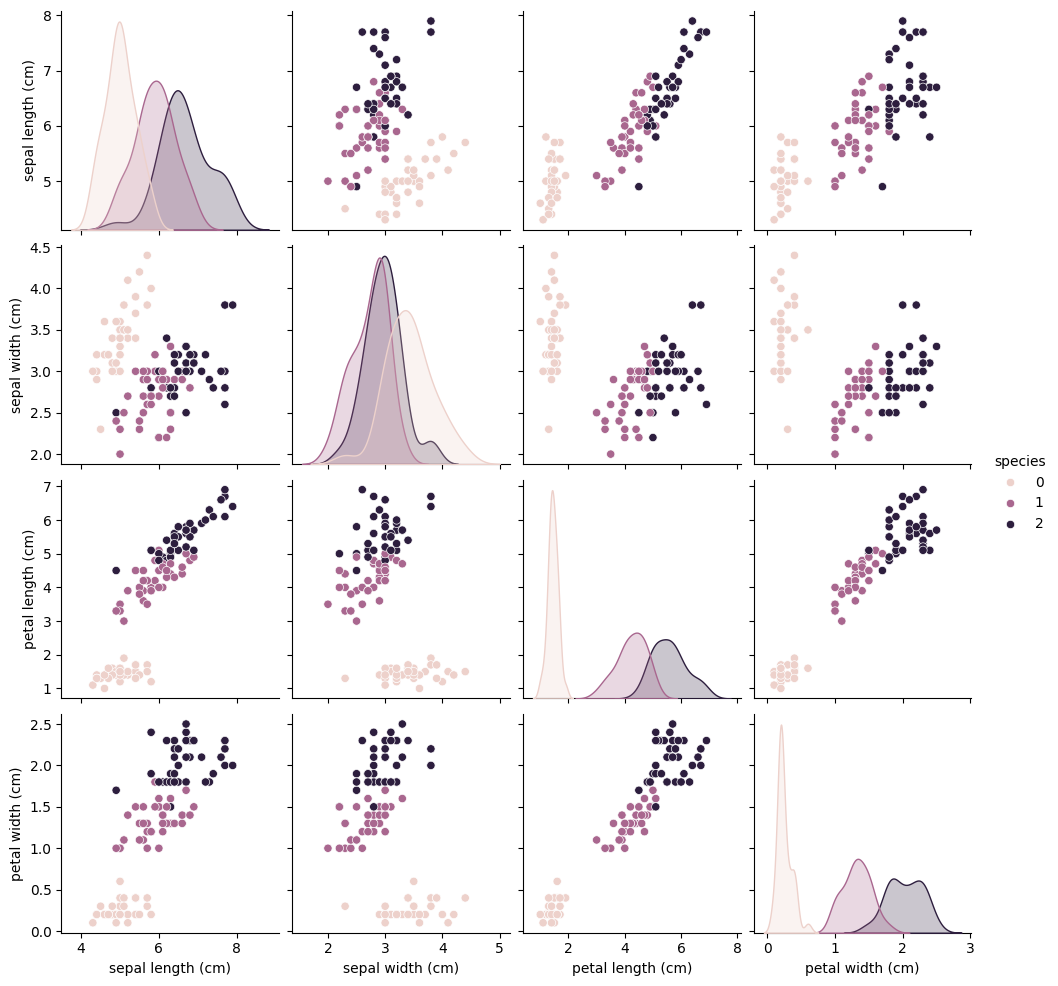

In [14]:
# Lootk at your data

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe['species'] = y_train
sns.pairplot(data=iris_dataframe, hue='species');


### Building Your First Model: k-Nearest Neighbors

We will use a k-nearest neighbors classifier

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k -nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighbor sClassifier is the number of neighbors, which we will set to 1:

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
x_new = np . array ([[ 5 , 2.9 , 1 , 0.2 ]]) # it simulates a single flower
print(f'X_new.shape: {x_new.shape}') 

X_new.shape: (1, 4)


In [25]:
# To make a prediction, we call the predict method of the knn object

prediction = knn.predict(x_new)
print(f'Prediction: {prediction}')
print(f'Predicted target name: {iris_dataset.target_names[prediction]}')

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model

This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set.

In [26]:
y_pred = knn.predict(X_test)
print(f'Teste set predictions: \n {y_pred}')

Teste set predictions: 
 [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 1 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [27]:
print(f'Test set score: {y_pred == y_test}')

Test set score: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [28]:
print(f'Test set score: {knn.score(X_test, y_test)}')

Test set score: 0.9736842105263158


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Object `score()` not found.
